# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
#!pip install newsapi

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gerardoespinoza/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
load_dotenv()

True

In [4]:
# Read your api key environment variable
# YOUR CODE HERE!

api_key = os.getenv("news_api")

In [5]:
print(api_key)

5a7fd3d96ac4436b8ebec923eec78f72


In [6]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [7]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

bitcoin_news_en['totalResults']

7687

In [8]:
#bitcoin_news_en

In [9]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)
ethereum_news_en['totalResults']

2184

In [10]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

article_1 = bitcoin_news_en['articles'][0]
article_1['content']

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'

In [11]:
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        #date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            #"date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
    

In [12]:
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,text,compound,positive,negative,neutral
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
4,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.105,0.057,0.838


In [13]:
#analyzer.polarity_scores('Today was a good day')

In [14]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        #date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            #"date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
    

In [15]:
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

,text,compound,positive,negative,neutral
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939
3,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
4,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843


In [16]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.drop(columns=['text']).describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.007505,0.05645,0.044450,0.899050
std,0.398230,0.06691,0.053827,0.078746
min,-0.612400,0.00000,0.000000,0.705000
25%,-0.381800,0.00000,0.000000,0.840250
50%,0.000000,0.00000,0.028500,0.903500
75%,0.231275,0.11150,0.077000,0.956500
max,0.726400,0.17800,0.184000,1.000000


In [17]:
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.007505,0.05645,0.044450,0.899050
std,0.398230,0.06691,0.053827,0.078746
min,-0.612400,0.00000,0.000000,0.705000
25%,-0.381800,0.00000,0.000000,0.840250
50%,0.000000,0.00000,0.028500,0.903500
75%,0.231275,0.11150,0.077000,0.956500
max,0.726400,0.17800,0.184000,1.000000


In [18]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.193535,0.070750,0.027600,0.901650
std,0.397977,0.068345,0.035596,0.065204
min,-0.381800,0.000000,0.000000,0.782000
25%,-0.074000,0.000000,0.000000,0.847500
50%,0.305600,0.075000,0.000000,0.920000
75%,0.502100,0.129500,0.067500,0.928500
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: ethereum

Q. Which coin had the highest positive score?

A: ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = list(stopwords.words('english'))
#sw.append('tesla')
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
#sw

In [21]:
#len(text)

In [22]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text

    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)   
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return tokens


In [23]:
tokenizer("today is a good day")

['today', 'good', 'day']

In [24]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['bitcoin_tokens'] = ''
# display(bitcoin_df.head())
bitcoin_df['bitcoin_tokens']=bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,text,compound,positive,negative,neutral,bitcoin_tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
4,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.105,0.057,0.838,"[london, june, 23, reuters, el, salvador, dete..."


In [25]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['ethereum_tokens'] = ''
ethereum_df['ethereum_tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,ethereum_tokens
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
3,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843,"[anthony, di, iorio, cofounder, ethereum, netw..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [26]:
from collections import Counter
from nltk import ngrams

In [27]:
all_articles=' '.join(bitcoin_df['text'])
btc_articles_tokens=tokenizer(all_articles)

In [28]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_gram_counts = Counter(ngrams(btc_articles_tokens, n=2))

In [29]:
all_articles_2 = ' '.join(ethereum_df['text'])
eth_article_tokens = tokenizer(all_articles_2)

In [30]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_gram_counts = Counter(ngrams(eth_article_tokens, n=2))

In [31]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [32]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(btc_articles_tokens, N=10)

[('bitcoin', 20),
 ('char', 18),
 ('reuters', 14),
 ('june', 8),
 ('cryptocurrency', 7),
 ('2021', 6),
 ('world', 5),
 ('monday', 5),
 ('illustration', 5),
 ('cryptocurrencies', 4)]

In [33]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(eth_article_tokens, N=10)

[('char', 20),
 ('bitcoin', 11),
 ('cryptocurrency', 11),
 ('ethereum', 10),
 ('reuters', 9),
 ('world', 7),
 ('network', 5),
 ('biggest', 5),
 ('losing', 4),
 ('previous', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [34]:
#conda install -c conda-forge wordcloud

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

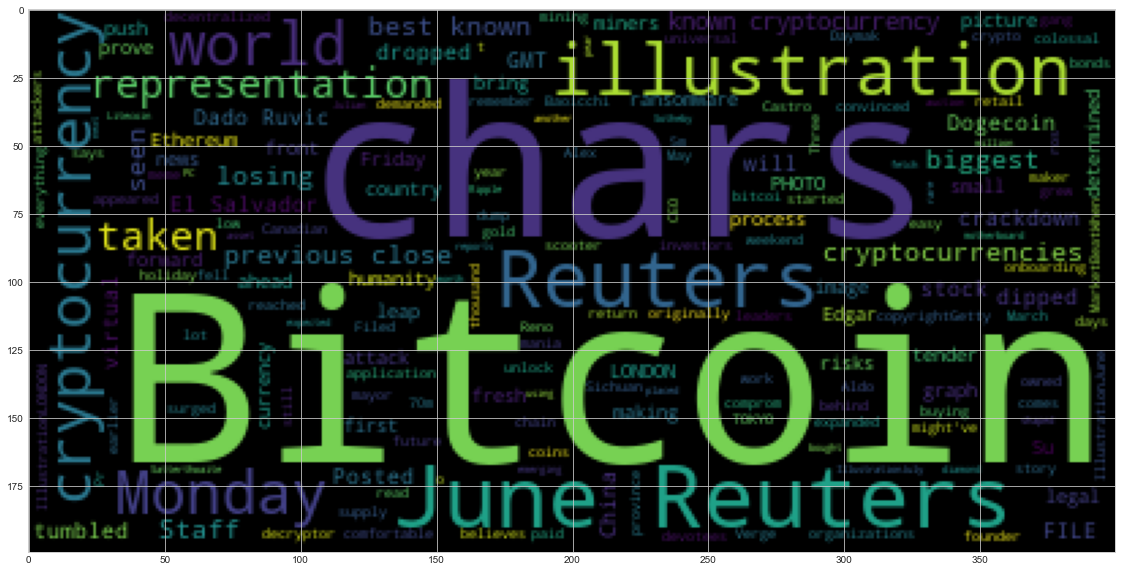

In [36]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

btc_string = ' '.join(bitcoin_df['text'])
#input_text = token_count(btc_articles_tokens)


wc = WordCloud().generate(btc_string)
plt.imshow(wc)


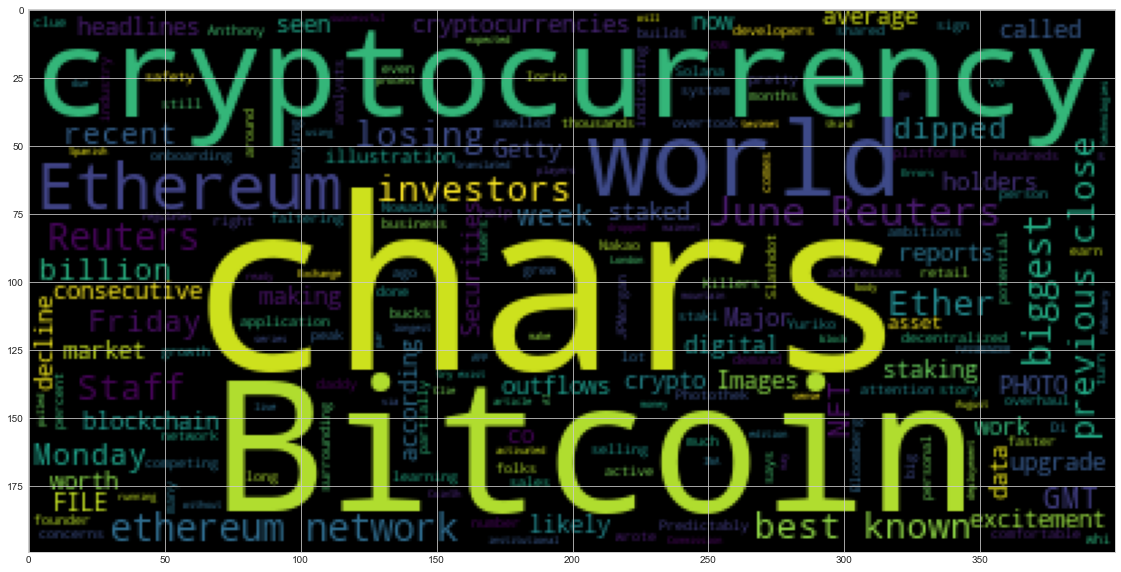

In [37]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

eth_string = ' '.join(ethereum_df['text'])
#input_text = token_count(btc_articles_tokens)


eth_wc = WordCloud().generate(eth_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [38]:
#conda install -c conda-forge spacy

In [39]:
import spacy
from spacy import displacy

In [40]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [41]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [42]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text = ' '.join(bitcoin_df['text'])
#bitcoin_text

In [43]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_doc = nlp(bitcoin_text)
# Add a title to the document
# YOUR CODE HERE!

In [51]:
#!conda list spacy

In [44]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_doc, style='ent')

In [45]:
# List all Entities
# YOUR CODE HERE!
#doc.ents
for ents in bitcoin_doc.ents:
     print(ents.text, ents.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
copyrightGetty Images PERSON
$70m MONEY
£50.5m MONEY
Bitcoin and Ethereum ORG
2021 DATE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
earlier this year DATE
June 21 DATE
Reuters ORG
Monday DATE
China GPE
Sichuan GPE
as low as $32,288 MONEY
first ORDINAL
March 15, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
June 30 DATE
Reuters ORG
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
49.9% PERCENT
Reuters ORG
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationJune 25 PERSON
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Monday DATE
China GPE
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 PERSON
Reut

---

### Ethereum NER

In [46]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text = ' '.join(ethereum_df['text'])

In [47]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(ethereum_text)
# Add a title to the document
# YOUR CODE HERE!

In [48]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style = 'ent')

In [49]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
         print(ent.text, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
NFT ORG
hundreds of thousands CARDINAL
Yuriko Nakao PERSON
Friday DATE
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
NFT ORG
90 percent PERCENT
recent weeks DATE
recent months DATE
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
Getty Images
 ORG
the third week DATE
February 2018 DATE
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
50.5 CARDINAL
Reuters ORG
June 25 DATE
Reuters ORG
8.51% PERCENT
31,699.83 MONEY
22:04 GMT TIME
Friday DATE
2,937.27 MONEY
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
49.9% PERCENT
Reuters ORG
June 21 DATE
Reuters ORG

---